<a href="https://colab.research.google.com/github/varun-beep/DeepLearning/blob/main/XOR_Boolean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [9]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

In [10]:
model = Sequential([
    Dense(2, input_dim=2, activation='relu'),  # Hidden layer with 2 neurons and ReLU activation
    Dense(1, activation='sigmoid')            # Output layer with 1 neuron and sigmoid activation
])


In [11]:
tf.random.set_seed(42)

In [12]:
model = Sequential([
    Dense(4, input_dim=2, activation='relu'),  # Increased hidden layer density (4 neurons)
    tf.keras.layers.Dropout(0.2),              # Added dropout layer with a 20% dropout rate
    Dense(1, activation='sigmoid')            # Output layer with 1 neuron and sigmoid activation
])

In [13]:
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
history = model.fit(X, y, epochs=10, verbose=1)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.7500 - loss: 0.7327
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7500 - loss: 0.7752
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.7500 - loss: 0.7680
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.2500 - loss: 0.8263
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.5000 - loss: 0.8200
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.5000 - loss: 0.7425
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5000 - loss: 0.7358
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.7500 - loss: 0.6677
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.7500 - loss: 0.6621
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.7500 - loss: 0.6142


In [15]:
predictions = model.predict(X)
print("Predictions:")
for i, pred in enumerate(predictions):
    print(f"Input: {X[i]}, Predicted Output: {round(pred[0], 2)}, Expected Output: {y[i][0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Predictions:
Input: [0 0], Predicted Output: 0.4699999988079071, Expected Output: 0
Input: [0 1], Predicted Output: 0.5400000214576721, Expected Output: 1
Input: [1 0], Predicted Output: 0.5400000214576721, Expected Output: 1
Input: [1 1], Predicted Output: 0.5699999928474426, Expected Output: 0


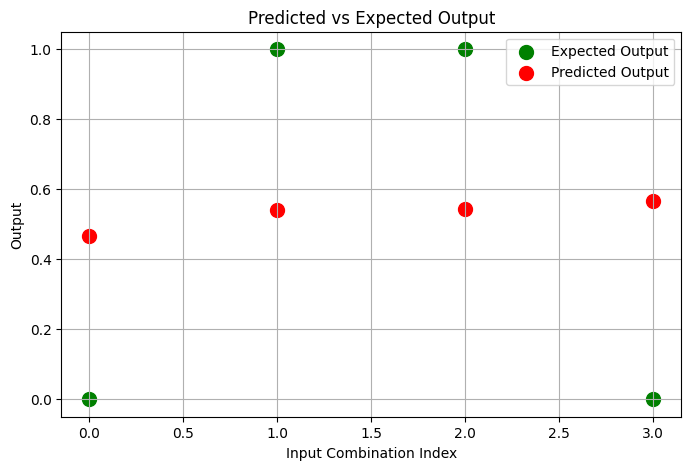

In [16]:
plt.figure(figsize=(8, 5))
predicted_outputs = predictions.flatten()  # Flatten predictions for visualization
plt.scatter(range(len(y)), y, label='Expected Output', color='green', s=100)
plt.scatter(range(len(predicted_outputs)), predicted_outputs, label='Predicted Output', color='red', s=100)
plt.title('Predicted vs Expected Output')
plt.xlabel('Input Combination Index')
plt.ylabel('Output')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
predictions = model.predict(X).flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [18]:
table_data = {
    "Input 1": X[:, 0],
    "Input 2": X[:, 1],
    "Expected Output": y.flatten(),
    "Predicted Output": [round(p, 2) for p in predictions]  # Round predictions to 2 decimal places
}

df = pd.DataFrame(table_data)

# Print the table
print("Predicted Values Table:")
print(df)

Predicted Values Table:
   Input 1  Input 2  Expected Output  Predicted Output
0        0        0                0              0.47
1        0        1                1              0.54
2        1        0                1              0.54
3        1        1                0              0.57


In [22]:
print(f"Training Accuracy: {history.history['accuracy'][-1]:.4f}")

Training Accuracy: 0.7500


In [26]:
# Get the weights and biases of the hidden and output layers
hidden_layer_weights, hidden_layer_biases = model.layers[0].get_weights()
output_layer_weights, output_layer_biases = model.layers[1].get_weights()

# Display the weights and biases
print("Hidden Layer Weights and Biases:")
print("Weights:\n", hidden_layer_weights)
print("Biases:\n", hidden_layer_biases)

print("\nOutput Layer Weights and Biases:")
print("Weights:\n", output_layer_weights)
print("Biases:\n", output_layer_biases)


ValueError: not enough values to unpack (expected 2, got 0)

In [25]:
model.summary()  #details of your model layers

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 4)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 53 (216.00 B)

 Trainable params: 17 (68.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 36 (148.00 B)